# Time Series Forecasting Using Python
Key Sections that we go through are:
<ul>
    <li>Understanding the time series.</li>
    <li>Data Exploration</li>
    <li>Time Series forecastig using different methods</li>
</ul>

## Introduction to Time Series
Which of the following is a time series?
<table>
    <tr>
        <td>Count of Cars</td>
        <td>CO<sub>2</sub> Level</td>
    </tr>
    <tr>
        <td><img src="normal.png"></td>
        <td><img src="timeSeries.png"></td>
    </tr>
</table>
<br>
The second one which shows the level of CO<sub>2</sub> over time is the one that's time series. The Count of Cars is not a time series because the count of car remains constant throughout the time and hence is independent of the time, therefore it's not a time series.
<br>
Time Series is generally data which is collected over time and is dependent on it.<br>
<h5>A More Formal Definition of Time Series:</h5>
<br>

A series of data points collected in time order is known as a time series. Most of business houses work on time series data to analyze sales number for the next year, website traffic, count of traffic, number of calls received, etc. Data of a time series can be used for forecasting.
<br>

Not every data collected with respect to time represents a time series.
<br>

Some of the examples of time series are:
<table>
    <tr>
        <td><b>Stock Prices</b></td>
        <td><img src="stock.jpg"></td>
    </tr>
    <tr>
        <td><b>Passenger Count of an airlines</b></td>
        <td><img src="airlines.jpg"></td>
    </tr>
    <tr>
        <td><b>Tempertaure over Time</b></td>
        <td><img src="temperature.png"></td>
    </tr>
    <tr>
        <td><b>Number of visitors in a hotel</b></td>
        <td><img src="hotel.gif"></td>
    </tr>
</table>

## Components of Time Series
<ol>
    <li><b>Trend</b></li>
    Trend is general direction in which something is developing or changing.
    <img src="trend.jpg">
    <br>
    Here the red line represents an increasing trend of the time series. So we see an increasing trend in this time series.    
    <li><b>Seasonality</b></li>
    A repeating pattern over a regular interval is seasonality. Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality.
    <img src="seasonality.jpg">
    <br>
    We can see that the time series is repeating its pattern after every 12 months i.e there is a peak every year during the month of january and a trough every year in the month of september, hence this time series has a seasonality of 12 months.
</ol>

## Difference between a Time Series and a Regression problem
Here an obvious question can arise. Like, why not use regression here, after all the data is numeric, right?
<br>
Yeah, but there's this issue mentioned right below:
<ul>
    <li>The main difference is that a time series is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.</li>
    <li>Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends,i.e. variations specific to a particular time frame.</li>
</ul>
<br>
So, predicting a time series using regression techniques is not a good approach.
<br>

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

# Table of Contents
<ol>
    <li><b><i>Understanding the data</i></b></li>
    <ol>
        <li>Hypothesis Generation</li>
        <li>Getting the system ready and loading the data</li>
        <li>Dataset structure and content</li>
        <li>Feature Extraction</li>
        <li>Exploratory Analysis</li>
    </ol>
    <li><b><i>Forecasting Using Multiple Modelling Techniques</i></b></li>
    <ol>
        <li>Splitting the data into training and validation part</li>
        <li>Modellling Techniques</li>
        <li>Holt's Linear Trend Model on daily time series</li>
        <li>Holt-Winter's Model on daily time series</li>
        <li>Introduction to ARIMA model</li>
        <li>Parameter tuning for ARIMA model</li>
        <li>SARIMAX model on daily time series</li>
    </ol>
</ol>

# Understanding the data
## 1. Hypothesis Generation
We will begin the first step.i.e., <i>hypothesis generation. Hypothesis generation</i> is the process of listing out the possibilites that may affect the outcome.
Hypothesis generation is done before having a look at the data in order to avoid any bias that may result after the observation.
<br>

Below are some of the possibilties that may affect the passenger count of <b><i>JetRail</b></i>
<ol>
    <li><b>There will be an increase in traffic as the year pass by.</b></li>
    <dl>
        <dt>Explanation: -</dt>
        <dd>Population has generally an upward trend with time, so it can be expected that there will a rise in the passenger count over time.</dd>
    </dl>
    <li><b>The traffic will be high during a couple of months in the year(Probably, b/w May to October).</b></li>
    <dl>
        <dt>Explanation: -</dt>
        <dd>The reason for this is due to tourists visits.</dd>
    </dl>
    <li><b>Traffic on Weekdays will be more compared to Weekends/holidays.</b></li>
    <dl>
        <dt>Explanation: -</dt>
        <dd>People will have to go to their jobs on weekdays.</dd>
    </dl>
    <li><b>Traffic during peak hours will be high.</b></li>
    <dl>
        <dt>Explanation: -</dt>
        <dd>Either people would be going on job or returning from.</dd>
    </dl>
</ol>

## 2. Getting System Ready
Followng python packages need to be installed, if not installed:
<ul>
    <li>Pandas</li>
    <li>Sklearn</li>
    <li>Matplotlib</li>
    <li>Numpy</li>
</ul>
And, the most important of all, <b><i>Python</i></b>. Do install python, since that's the language you will be coding in.
<br>

Let's import all the necessary packages, first and then read the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

Let's just copy the dataset into some copy variable just to ensure that we don't mess up the original dataset.

In [3]:
test_copy = test.copy()
train_copy = train.copy()

## 3. Data Structure & Content
Let's jump onto the data and look at the features of the test and train dataset.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


The train dataset has 3 columns, and 18288 rows, where each row tells describes the count of passengers during an hour.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [6]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


The ID column is of int data type, datetime column is of object, which woud be required to convert into some numeric format, and count is integer.

In [7]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


## 4. Feature Extraction
Since the <i>"Datatime"</i> is of dtype object we need to extract the date and time out of it. Since it's of type object we need to convert it into datetime for the feature extraction.
<br>

Let's do that first...

In [8]:
# Conversion of object into datetime using to_datetime() method
train['Datetime'] = pd.to_datetime(train.Datetime, format="%d-%m-%Y %H:%M")
test['Datetime'] = pd.to_datetime(test.Datetime, format="%d-%m-%Y %H:%M")

# Doing the same for the copy variables
train_copy['Datetime'] = pd.to_datetime(train_copy.Datetime, format="%d-%m-%Y %H:%M")
test_copy['Datetime'] = pd.to_datetime(test_copy.Datetime, format="%d-%m-%Y %H:%M")

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.7 KB


We made some hypothesis about the hour, day, month, and year, so lets grab those features out of the dataset and analyse them. 

In [10]:
x = train.Datetime.dt.hour #Extracting hour from the "Datetime" column of train dataset
x.head()

0    0
1    1
2    2
3    3
4    4
Name: Datetime, dtype: int64

In [11]:
# Extracting the hour, day, month, year from all the datasets.
for i in (train, test, train_copy, test_copy):
    i['hour'] = i.Datetime.dt.hour
    i['day'] = i.Datetime.dt.day
    i['month'] = i.Datetime.dt.month
    i['year'] = i.Datetime.dt.year

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 7 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
hour        18288 non-null int64
day         18288 non-null int64
month       18288 non-null int64
year        18288 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 1000.2 KB


In [13]:
train.head()

,ID,Datetime,Count,hour,day,month,year
0,0,2012-08-25 00:00:00,8,0,25,8,2012
1,1,2012-08-25 01:00:00,2,1,25,8,2012
2,2,2012-08-25 02:00:00,6,2,25,8,2012
3,3,2012-08-25 03:00:00,2,3,25,8,2012
4,4,2012-08-25 04:00:00,2,4,25,8,2012


We made a prediction about traffic on weekdays and weekends. So let's grab that for analysis.
<br>

Let's extract the dayofweek from the dataset and remember that the number 5 and 6 represent the weekends, since the indexing of weeks starts form 0 and ends at 6.

In [14]:
train['dayofweek'] = train.Datetime.dt.dayofweek
train['weekend'] = train['dayofweek'].apply(lambda x: 1 if x==5 or x==6 else 0)

Let's visualize the data to check the validity of our hypothesis and further analysis.

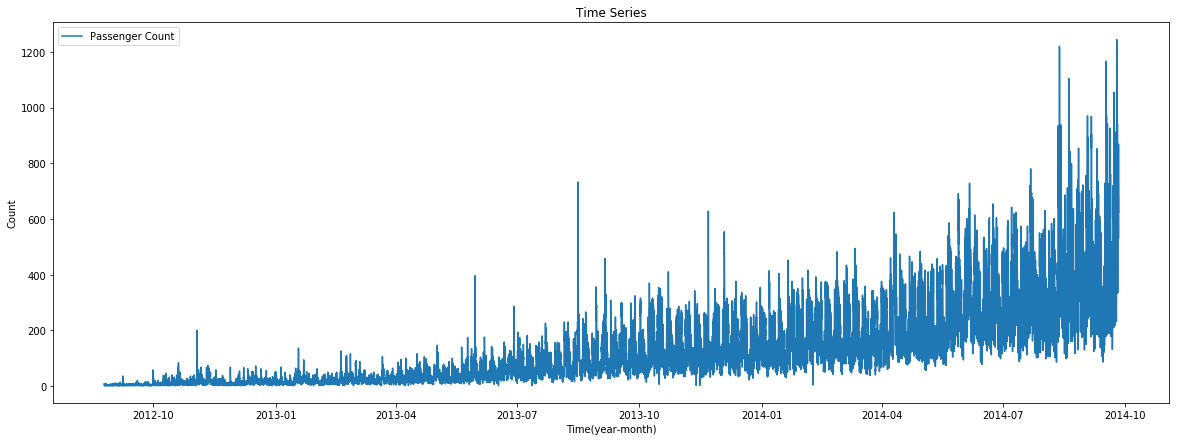

In [15]:
train.index = train.Datetime #Setting the index to 'Datetime' so plt will automatically use it as x-axis
plt.figure(figsize=(20,7))
plt.plot(train['Count'], label="Passenger Count")
plt.title("Time Series")
plt.xlabel("Time(year-month)")
plt.ylabel("Count")
plt.legend(loc="best")
plt.show()

Clearly the visualization follows our first hypotesis.i.e., there's an upward trend in the graph, which means the passenger count did increase with the time. Also there are sudden hike in the count of passengers, possibly because of some event. Our further analysis will be based on train dataset and we'll make prediction on test dataset.

Let's recall our hypothesis again:
<ul>
    <li>Traffic will increase as years pass by.</li>
    <li>Traffic will be high during certain months of the year.</li>
    <li>Traffic will be high on weekdays than weekends.</li>
    <li>Traffic during peak hours will be high.</li>
</ul>
After looking at the database we'll try to validate our hypothesis and make other inferences from the dataset.

## 5. Expolaratory Analysis
Let's try to verify out hypothesis from the train dataset.

Our first hypothesis was that the traffic will increase with the year. Let's visualize the yearly passenger count plot.

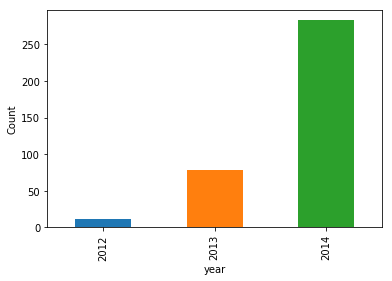

In [16]:
train.groupby('year')['Count'].mean().plot.bar()
plt.ylabel('Count')
plt.show()

Clearly there's significant(exponential) hike in the average passenger count as the years pass by. Hence, our first hypothesis stood out to be correct.
<br>

Our second hypothesis was about inrease in traffic during certain months of the year(from May to October). So let's see relationship between count and month.

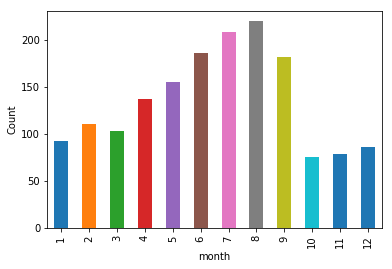

In [17]:
train.groupby('month')['Count'].mean().plot.bar()
plt.ylabel('Count')
plt.show()

The count increases as the months pass by over the year, but suddenly there's a drop in passenger count during last three months. Let's check that out for each year. For that, we will find the mean count of passengers over the months of each year.

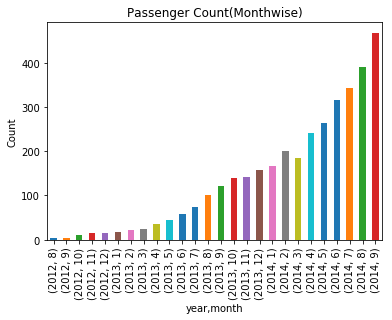

In [18]:
train.groupby(['year', 'month'])['Count'].mean().plot.bar()
plt.title("Passenger Count(Monthwise)")
plt.ylabel('Count')
plt.show()

<ul>
    <li>We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.</li>
    <li>Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.</li>
    <li>In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.</li>
</ul>
<br>
Now, let's look at the daily mean of passenger count.

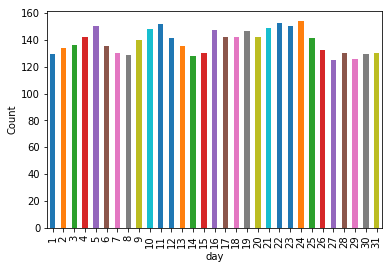

In [19]:
train.groupby('day')['Count'].mean().plot.bar()
plt.ylabel('Count')
plt.show()

No inference from the day wise mean count of passenger can be gained. Let's try to test the hypothesis on the peak hours.

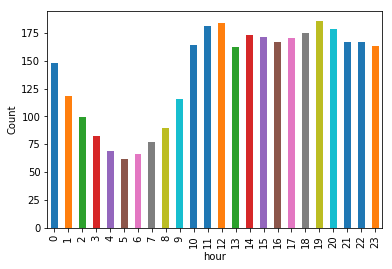

In [20]:
train.groupby('hour')['Count'].mean().plot.bar()
plt.ylabel('Count')
plt.show()

<ul>
    <li>It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.</li>
    <li>After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.</li>
</ul>
<br>

Let's try to validate our hypothesis that there will be higher traffic on weekdays

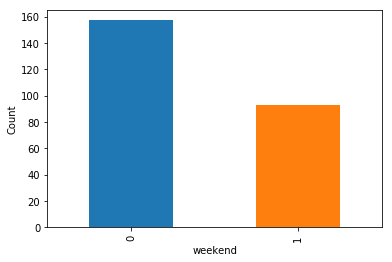

In [21]:
train.groupby('weekend')['Count'].mean().plot.bar()
plt.ylabel('Count')
plt.show()

It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.
<br>

Now we will try to look at the day wise passenger count. (0 -> Monday, 6 -> Sunday)

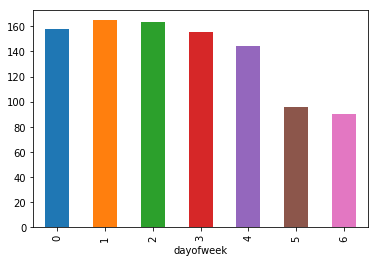

In [22]:
train.groupby('dayofweek')['Count'].mean().plot.bar()

From the above plot we can see that there's decrease in passenger count on saturdays and sundays, compared to other days of weeks.

#### Let's look at the basic modelling techniques. 

As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

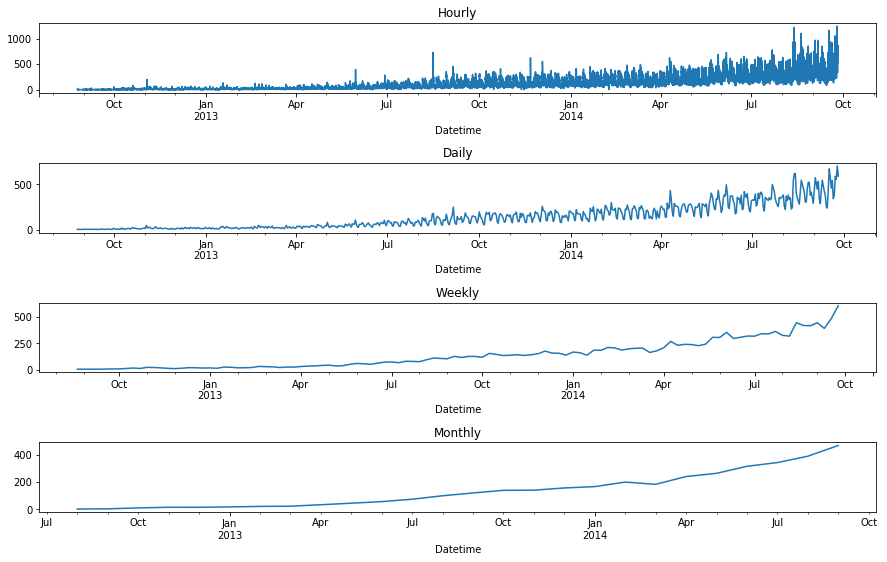

In [23]:
fig, axs = plt.subplots(4,1)
plt.subplots_adjust(hspace=1)
hourly = train.resample('H').mean()
hourly.Count.plot(figsize=(15,9), title="Hourly", ax=axs[0])
daily = train.resample('D').mean()
daily.Count.plot(figsize=(15,9), title="Daily", ax=axs[1])
weekly = train.resample('W').mean()
weekly.Count.plot(figsize=(15,9), title="Weekly", ax=axs[2])
monthly = train.resample('M').mean()
monthly.Count.plot(figsize=(15,9), title="Monthly", ax=axs[3])
plt.show()

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.
<br>

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

# Forecasting Using Multiple Moldelling Techniques
As we have validated the all our hypothesis, we can move forward and build models for time series forecasting. But before delving into it, let's figure out the validation dataset for the purpose of quantifying the performance and generalization ability of our model. Below are some of the properties required for the purpose.
<ul>
    <li>The dataset should have actual values so that we can validate our model against. Therefore test dataset cannot be used for the purpose.</li>
    <li>The model should not be trained on validation dataset.i.e., train dataset.</li>
</ul>
So, for the above two reasons, we generally divide the train dataset into two parts. One part is used to train the model and the other part is used as the validation dataset. Now there are multiple ways to divide the train dataset such as Random Division etc. 

# 1. Splitting the data into training and validation part
Now we will divide our data in train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.
<br>

<b>NOTE</b> - It is always a good practice to create a validation set that can be used to assess our models locally. If the validation metric(rmse) is changing in proportion to public leaderboard score, this would imply that we have chosen a stable validation technique.
<br>

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.
<br>

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [24]:
train.head()

,ID,Datetime,Count,hour,day,month,year,dayofweek,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,0,25,8,2012,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,1,25,8,2012,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2,25,8,2012,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,3,25,8,2012,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,4,25,8,2012,5,1


In [25]:
train.tail()

,ID,Datetime,Count,hour,day,month,year,dayofweek,weekend
Datetime,,,,,,,,,
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868,19,25,9,2014,3,0
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732,20,25,9,2014,3,0
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702,21,25,9,2014,3,0
2014-09-25 22:00:00,18286,2014-09-25 22:00:00,580,22,25,9,2014,3,0
2014-09-25 23:00:00,18287,2014-09-25 23:00:00,534,23,25,9,2014,3,0


In [26]:
Train = train.loc['2012-08-25':'2014-06-24']
Valid = train.loc['2014-06-25':'2014-09-25']

We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.
<br>

Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the future values which is not the case in real scenario. So, this kind of split is used while working with time related problems.
<br>

Now let's visualize the <b>Train</b> & <b>Valid</b> dataset.

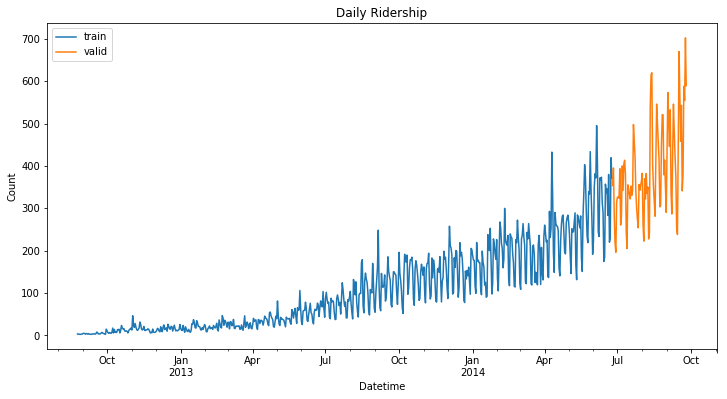

In [27]:
plt.figure(figsize=(12,6))
Train.resample('D')['Count'].mean().plot(label="train")
Valid.resample('D')['Count'].mean().plot(label="valid")
plt.ylabel('Count')
plt.legend(loc="best")
plt.title('Daily Ridership')
plt.show()

Here the blue part represents the train data and the orange part represents the validation data.
<br>

We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally we will make predictions for the test dataset.

Now there are various models to forecast the time series. Methods which we will be discussing for the forecast are:
<b>
<ol>
    <li>Naive Approach</li>
    <li>Moving Average</li>
    <li>Simple Exponential Smoothing</li>
    <li>Holt's Linear Trend Model</li>
</ol>
</b>
Let's discuss each of it in detail now
<br>

<h2>i. Naive Approach</h2>
In this forecasting method, we assume that the observations to be forecasted are equal to the last observation. So we expect a straight line as prediction. Let's understand it with an example.
<br>

Suppose we have passenger count for 5 days as shown below:
<table>
    <tr>
        <td>Day</td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
    </tr>
    <tr>
        <td>Passenger Count</td>
        <td>10</td>
        <td>12</td>
        <td>14</td>
        <td>13</td>
        <td>15</td>
    </tr>
</table>
And we are supposed to predict the passenger count for next two days. The naive approach will assign the last observation's values as the forecast for the next two days. The forecast would be:
<table>
    <tr>
        <td>Day</td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
        <td>6</td>
        <td>7</td>
    </tr>
    <tr>
        <td>Passenger Count</td>
        <td>10</td>
        <td>12</td>
        <td>14</td>
        <td>13</td>
        <td>15</td>
        <td>15</td>
        <td>15</td>
    </tr>
</table>
<img src="naive.jpg">
The blue line is the prediction here. All the predictions are equal to the last observed point.
<br>

Let's make naive prediction for our validation dataset.

In [28]:
models = pd.DataFrame(Valid[['Count']])
models['naive'] = Train.Count[-1]
models.head()

,Count,naive
Datetime,,
2014-06-25 00:00:00,332,390
2014-06-25 01:00:00,260,390
2014-06-25 02:00:00,218,390
2014-06-25 03:00:00,244,390
2014-06-25 04:00:00,168,390


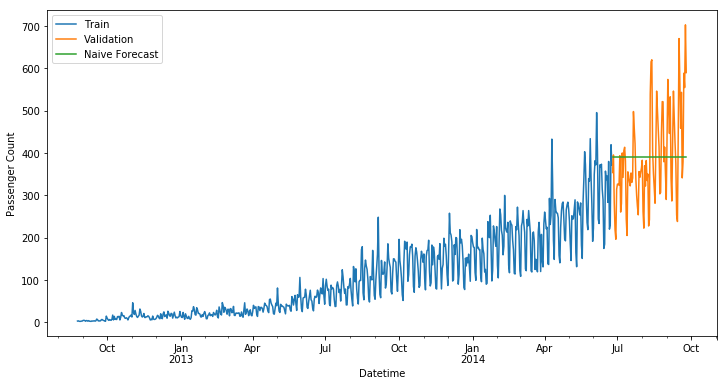

In [29]:
#Visualizing the naive forecast
plt.figure(figsize=(12,6))
Train.resample('D').Count.mean().plot(label="Train")
models.resample('D').Count.mean().plot(label="Validation")
models.resample('D').naive.mean().plot(label="Naive Forecast")
plt.legend(loc="best")
plt.ylabel("Passenger Count")
plt.show()

<ul>
    <li>We can calculate the accuracy of our prediction using RMSE (Root Mean Square Error).</li>
    <li>RMSE is the standard deviation of the residuals.</li>
    <li>Residuals are a measure of how far from the regression line data points are.</li>
</ul>
Let's calculate the RMSE for our forecast to check the accuracy of the naive model.

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Valid.Count, models.naive))
print(rms)

186.37368520699056


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.
<br>

<h2>ii. Moving Average</h2>
In this technique we will take the average of observations of last few time period only.
<br>

Let's consider an example for it.
<img src="ma.png">
<br>

Here the predictions are made on the basis of average of last few points instead of taking all the previously known values.
<br>

Let's try the rolling mean for last 10, 20, 50  days and visualize the results.

In [31]:
Train.Count.rolling(10).mean().head()

Datetime
2012-08-25 00:00:00   NaN
2012-08-25 01:00:00   NaN
2012-08-25 02:00:00   NaN
2012-08-25 03:00:00   NaN
2012-08-25 04:00:00   NaN
Name: Count, dtype: float64

In [32]:
 Train.Count.rolling(10).mean().tail()

Datetime
2014-06-24 19:00:00    464.0
2014-06-24 20:00:00    460.6
2014-06-24 21:00:00    449.6
2014-06-24 22:00:00    437.4
2014-06-24 23:00:00    439.2
Name: Count, dtype: float64

In [33]:
models['moving_avg'] = Train.Count.rolling(10).mean()[-1]
models.head()

,Count,naive,moving_avg
Datetime,,,
2014-06-25 00:00:00,332,390,439.2
2014-06-25 01:00:00,260,390,439.2
2014-06-25 02:00:00,218,390,439.2
2014-06-25 03:00:00,244,390,439.2
2014-06-25 04:00:00,168,390,439.2


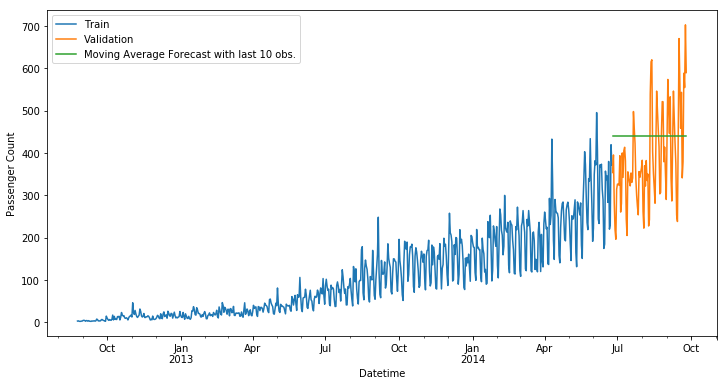

In [34]:
#Visualizing the moving average forecast with rolling mean of 10 observations
plt.figure(figsize=(12,6))
Train.resample('D').Count.mean().plot(label="Train")
models.resample('D').Count.mean().plot(label="Validation")
models.resample('D').moving_avg.mean().plot(label="Moving Average Forecast with last 10 obs.")
plt.legend(loc="best")
plt.ylabel("Passenger Count")
plt.show()

In [35]:
models['moving_avg'] = Train.Count.rolling(20).mean()[-1]
models.head()

,Count,naive,moving_avg
Datetime,,,
2014-06-25 00:00:00,332,390,378.6
2014-06-25 01:00:00,260,390,378.6
2014-06-25 02:00:00,218,390,378.6
2014-06-25 03:00:00,244,390,378.6
2014-06-25 04:00:00,168,390,378.6


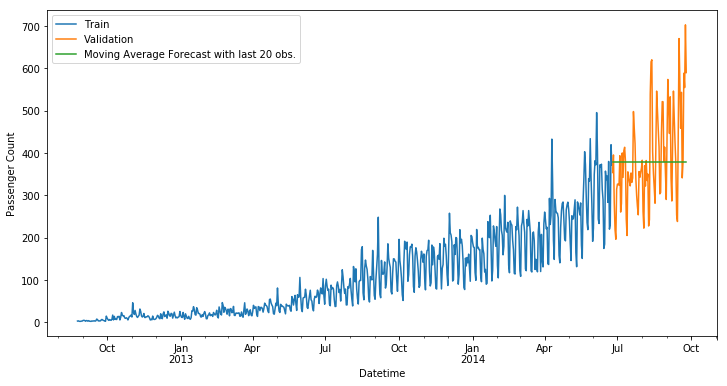

In [36]:
#Visualizing the moving average forecast with rolling mean of 20 observations
plt.figure(figsize=(12,6))
Train.resample('D').Count.mean().plot(label="Train")
models.resample('D').Count.mean().plot(label="Validation")
models.resample('D').moving_avg.mean().plot(label="Moving Average Forecast with last 20 obs.")
plt.legend(loc="best")
plt.ylabel("Passenger Count")
plt.show()

In [37]:
models['moving_avg'] = Train.Count.rolling(50).mean()[-1]
models.head()

,Count,naive,moving_avg
Datetime,,,
2014-06-25 00:00:00,332,390,398.04
2014-06-25 01:00:00,260,390,398.04
2014-06-25 02:00:00,218,390,398.04
2014-06-25 03:00:00,244,390,398.04
2014-06-25 04:00:00,168,390,398.04


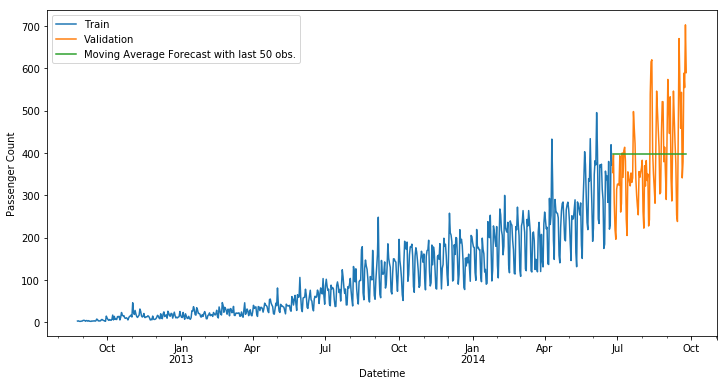

In [38]:
#Visualizing the moving average forecast with rolling mean of 50 observations
plt.figure(figsize=(12,6))
Train.resample('D').Count.mean().plot(label="Train")
models.resample('D').Count.mean().plot(label="Validation")
models.resample('D').moving_avg.mean().plot(label="Moving Average Forecast with last 50 obs.")
plt.legend(loc="best")
plt.ylabel("Passenger Count")
plt.show()

In [39]:
rms = sqrt(mean_squared_error(Valid.Count, models.moving_avg))
rms

186.5773761711873

<h2>iii. Simple Exponential Smoothing</h2>
<br>
In this technique, we assign larger weights to more recent observations than to observations from the distant past.
The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.
<br>

<b>NOTE</b> - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.
<br>

Let's look at the following example:
<img src="ses.jpg">
<br>
Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.

In [41]:
from statsmodels.tsa.api import  ExponentialSmoothing, SimpleExpSmoothing, Holt
fit2 = SimpleExpSmoothing(np.array(Train.Count)).fit(smoothing_level=0.6, optimized=False)
models['SES'] = fit2.forecast(len(Valid))
models.head()

,Count,naive,moving_avg,SES
Datetime,,,,
2014-06-25 00:00:00,332,390,398.04,385.577197
2014-06-25 01:00:00,260,390,398.04,385.577197
2014-06-25 02:00:00,218,390,398.04,385.577197
2014-06-25 03:00:00,244,390,398.04,385.577197
2014-06-25 04:00:00,168,390,398.04,385.577197


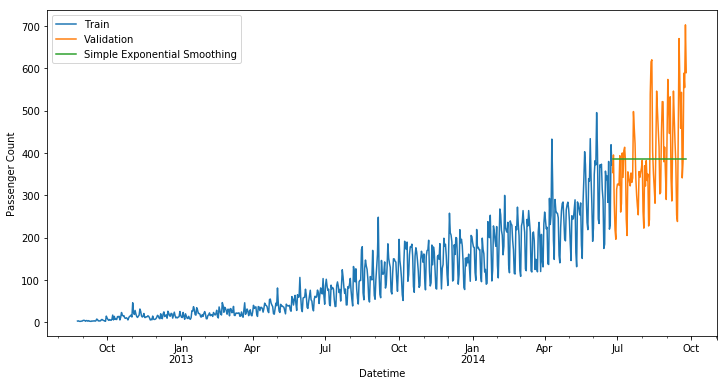

In [42]:
#Visualizing the SES forecast
plt.figure(figsize=(12,6))
Train.resample('D').Count.mean().plot(label="Train")
models.resample('D').Count.mean().plot(label="Validation")
models.resample('D').SES.mean().plot(label="Simple Exponential Smoothing")
plt.legend(loc="best")
plt.ylabel("Passenger Count")
plt.show()

In [43]:
rms = sqrt(mean_squared_error(Valid.Count, models.SES))
rms

186.40944652452376

<h2>iv. Holt's Linear Trend Model</h2>
<ul>
    <li>It is an extension of simple exponential smoothing to allow forecasting of data with a trend.</li>
    <li>This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.</li>
</ul>
First of all let us visualize the trend, seasonality and error in the series.
<br>
We can decompose the time series in four parts.
<br>
<ul>
    <li>Observed, which is the original time series.</li>
    <li>Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.</li>
    <li>Seasonal, which tells us about the seasonality in the time series.</li>
    <li>Residual, which is obtained by removing any trend or seasonality in the time series.</li>
</ul>
Lets visualize all these parts.

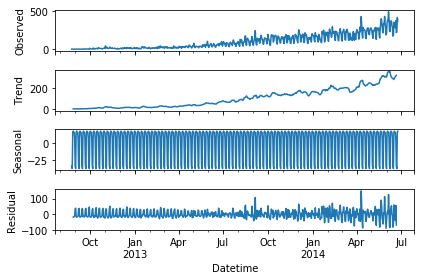

In [45]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.resample('D').Count.mean()).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

In [52]:
fit1 = Holt(np.array(Train.Count)).fit(smoothing_level=0.2, smoothing_slope=0.01)
models['holt'] = fit1.forecast(len(Valid))
models.head()

,Count,naive,moving_avg,SES,holt
Datetime,,,,,
2014-06-25 00:00:00,332,390,398.04,385.577197,416.197528
2014-06-25 01:00:00,260,390,398.04,385.577197,417.076696
2014-06-25 02:00:00,218,390,398.04,385.577197,417.955864
2014-06-25 03:00:00,244,390,398.04,385.577197,418.835032
2014-06-25 04:00:00,168,390,398.04,385.577197,419.714200


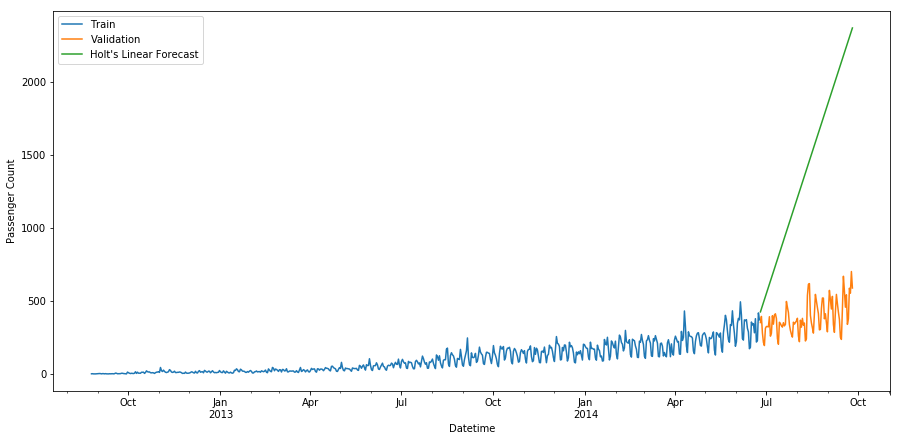

In [53]:
#Visualizing the Holt's Forecast
plt.figure(figsize=(15,7))
Train.resample('D').Count.mean().plot(label="Train")
Valid.resample('D').Count.mean().plot(label="Validation")
models.resample('D').holt.mean().plot(label="Holt's Linear Forecast")
plt.ylabel('Passenger Count')
plt.legend(loc="best")
plt.show()